# Preliminaries and Enter Your Ticker Here!

In [1]:
import numpy as np
import pandas as pd

symbol = 'FB'

## Leading Indicators Prices

In [190]:
from iexfinance.stocks import Stock

indicators = ['SPY', 'QQQ']
batch = Stock( indicators )
batch.get_price()

{'QQQ': 168.23, 'SPY': 270.14}

In [191]:
quotes = batch.get_quote()
DisplayDict = {
    'Last': 'latestPrice',
    '% Change': 'changePercent'
}

for sym in indicators:
    print(f'---{sym}---')
    for display in DisplayDict:
        print( f'{display}: {quotes[sym][DisplayDict[display]]}')

---SPY---
Last: 270.14
% Change: -0.00953
---QQQ---
Last: 168.23
% Change: -0.01343


In [194]:
batch.get_book()

{'QQQ': {'asks': [],
  'bids': [],
  'quote': {'avgTotalVolume': 50174531,
   'calculationPrice': 'close',
   'change': -2.29,
   'changePercent': -0.01343,
   'close': 168.23,
   'closeTime': 1549573200213,
   'companyName': 'Invesco QQQ Trust Series 1',
   'delayedPrice': 168.23,
   'delayedPriceTime': 1549573200250,
   'extendedChange': -0.13,
   'extendedChangePercent': -0.00077,
   'extendedPrice': 168.1,
   'extendedPriceTime': 1549576788700,
   'high': 169.45,
   'iexAskPrice': 0,
   'iexAskSize': 0,
   'iexBidPrice': 0,
   'iexBidSize': 0,
   'iexLastUpdated': 1549576788700,
   'iexMarketPercent': 0.0096,
   'iexRealtimePrice': 168.1,
   'iexRealtimeSize': 800,
   'iexVolume': 402305,
   'latestPrice': 168.23,
   'latestSource': 'Close',
   'latestTime': 'February 7, 2019',
   'latestUpdate': 1549573200213,
   'latestVolume': 41906771,
   'low': 166.95,
   'marketCap': 64852665000,
   'open': 168.94,
   'openTime': 1549549800941,
   'peRatio': None,
   'previousClose': 170.52,


## Stock Description

In [7]:
from iexfinance.stocks import Stock

myStock = Stock(symbol)

In [8]:
info = myStock.get_company()
lKeyInfo = ['companyName', 'description', 'exchange']

print('--- Company Description ---')
for key in lKeyInfo:
    print(f'{key}: {info[key]}')

--- Company Description ---
companyName: Facebook Inc.
description: Facebook Inc is the world's largest online social network. Its products are Facebook, Instagram, Messenger, WhatsApp, and Oculus. Its products enable people to connect and share through mobile devices and personal computers.
exchange: Nasdaq Global Select


In [30]:
stats = myStock.get_key_stats()
lKeyStats = [ 'beta', 'dividendRate', 'exDividendDate',
            'priceToBook', 'priceToSales', 'sharesOutstanding',
            'week52high', 'week52low']

print('--- Key Stats ---')
for key in lKeyStats:
    print( f'{key}: {stats[key]}')

--- Key Stats ---
beta: 0.913787
dividendRate: 0
exDividendDate: 0
priceToBook: 5.62
priceToSales: 8.604919
sharesOutstanding: 2853989800
week52high: 218.62
week52low: 123.02


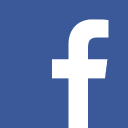

In [31]:
logo = myStock.get_logo()

from IPython.display import Image
Image(logo['url'])

## Market Book
**Need to be tested during market hours**

In [18]:
myStock = Stock(symbol)
book = myStock.get_book()

def PrintBidAsk(quote_dict):
    if not quote_dict['bids'] or not quote_dict['asks']:
        data = quote_dict['quote']
        for side in ['Bid', 'Ask']:
            price = data[f'iex{side}Price']
            size = data[f'iex{side}Size']
            
            print(f'Last {side}: {price} x {size}')
        
        print(f'Updated at: {data["iexLastUpdated"]}')
    
    else:   # Show Live Bid Ask
        for side in ['bids', 'asks']:
            price = quote_dict[side][0]['price']
            size = quote_dict[side][0]['size']
            
            print(f'{side}: {price} x {size}')

In [19]:
PrintBidAsk(book)

Last Bid: 0 x 0
Last Ask: 0 x 0
Updated at: 1549313999952


In [17]:
book

{'asks': [{'price': 166.43, 'size': 200, 'timestamp': 1549292661171},
  {'price': 168, 'size': 121, 'timestamp': 1549291229030},
  {'price': 170.48, 'size': 100, 'timestamp': 1549290943007},
  {'price': 172.09, 'size': 100, 'timestamp': 1549290601954},
  {'price': 175, 'size': 100, 'timestamp': 1549290602657},
  {'price': 178, 'size': 300, 'timestamp': 1549290602660},
  {'price': 180, 'size': 200, 'timestamp': 1549290602651},
  {'price': 200, 'size': 250, 'timestamp': 1549290601922}],
 'bids': [{'price': 166.35, 'size': 100, 'timestamp': 1549292662974},
  {'price': 166.31, 'size': 100, 'timestamp': 1549292650016},
  {'price': 120, 'size': 100, 'timestamp': 1549290606899},
  {'price': 98.44, 'size': 112, 'timestamp': 1549290600062}],
 'quote': {'avgTotalVolume': 28528671,
  'calculationPrice': 'tops',
  'change': 0.72,
  'changePercent': 0.00434,
  'close': 165.71,
  'closeTime': 1549054800529,
  'companyName': 'Facebook Inc.',
  'delayedPrice': 166.57,
  'delayedPriceTime': 15492917606

## Intraday Time Series Tick Data for Consecutive Dates
* for pandas ploting [this](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/) was helpful
* for DateTime objects manipulation, [this](http://strftime.org/) is a good reference

In [66]:
from datetime import datetime, timedelta, date
from iexfinance.stocks import get_historical_intraday
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

tdate = datetime(2019,2,4)
#tdate_neg1 = tdate - timedelta( days = 3)
tdate_neg1 = MarketDateAdj( tdate, -1, 'NYSE')

tdata = get_historical_intraday(symbol, tdate, output_format = 'pandas')
tdata_neg1 = get_historical_intraday(symbol, tdate_neg1, output_format = 'pandas')

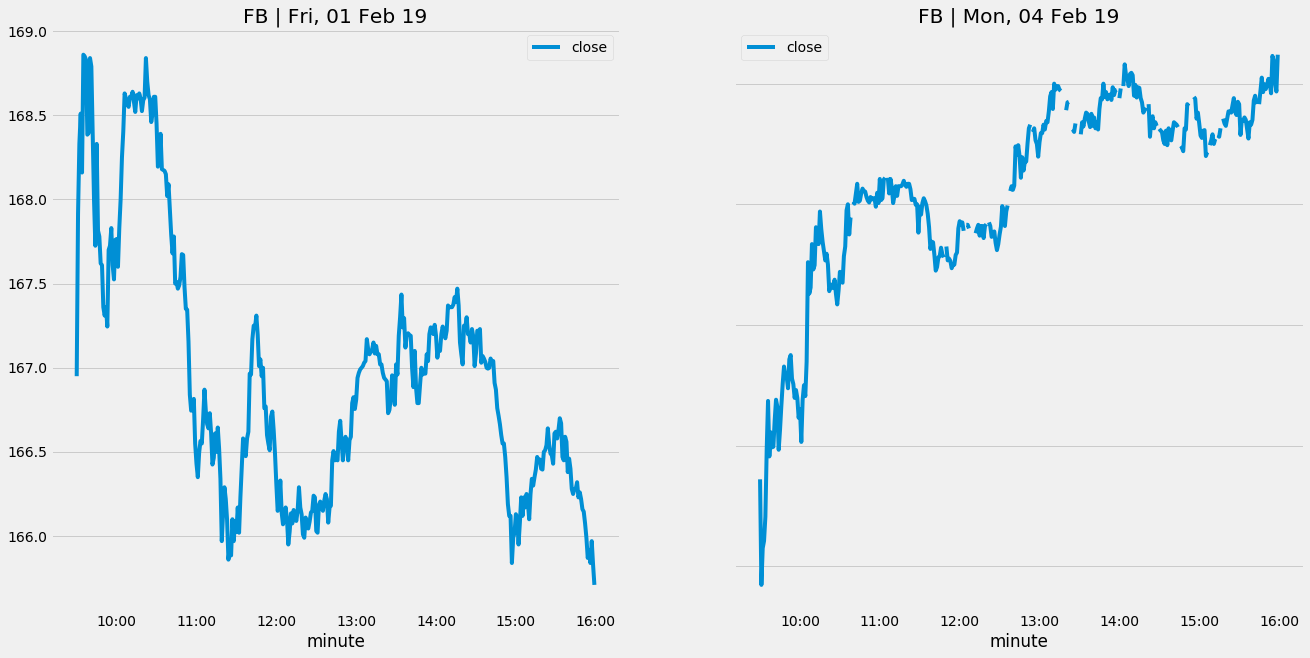

In [70]:
tdata.index = pd.DatetimeIndex( tdata.index )
tdata_neg1.index = pd.DatetimeIndex( tdata_neg1.index)

plot_dict = {
    tdate_neg1 : tdata_neg1,
    tdate : tdata
}

#tdata.plot(y = 'close', title = f'{symbol} {tdate.strftime("%d %b %y")}')

for i, idate in enumerate(plot_dict):
    ax = plt.subplot(1,2, i+1) 
    plot_dict[idate].plot( y = 'close', 
                          title = f'{symbol} | {idate.strftime("%a, %d %b %y")}', 
                         ax = ax, figsize = (20,10),
                         sharey = True)

### Let's join the two Dates' intraday prices into one DF

In [109]:
def DatePlusTime( DateObj, TimeObj):
    '''
    return a DateTime object
    
    requires datetime, time, and timedelta
    '''
    tdelta = datetime.combine( date.min, TimeObj) - datetime.min
    return DateObj  + tdelta

# Turning Time of the DF into DateTime
tdata['DT'] = tdata.index
tdata['DT'] = tdata['DT'].apply(lambda x : DatePlusTime(tdate ,x.time()))

tdata_neg1['DT'] = tdata_neg1.index
tdata_neg1['DT'] = tdata_neg1['DT'].apply(lambda x : DatePlusTime(tdate_neg1 ,x.time()))

# Concat the two day
l_col = ['DT', 'close']
data = pd.concat([tdata[l_col], tdata_neg1[l_col]])
data.index = data['DT']

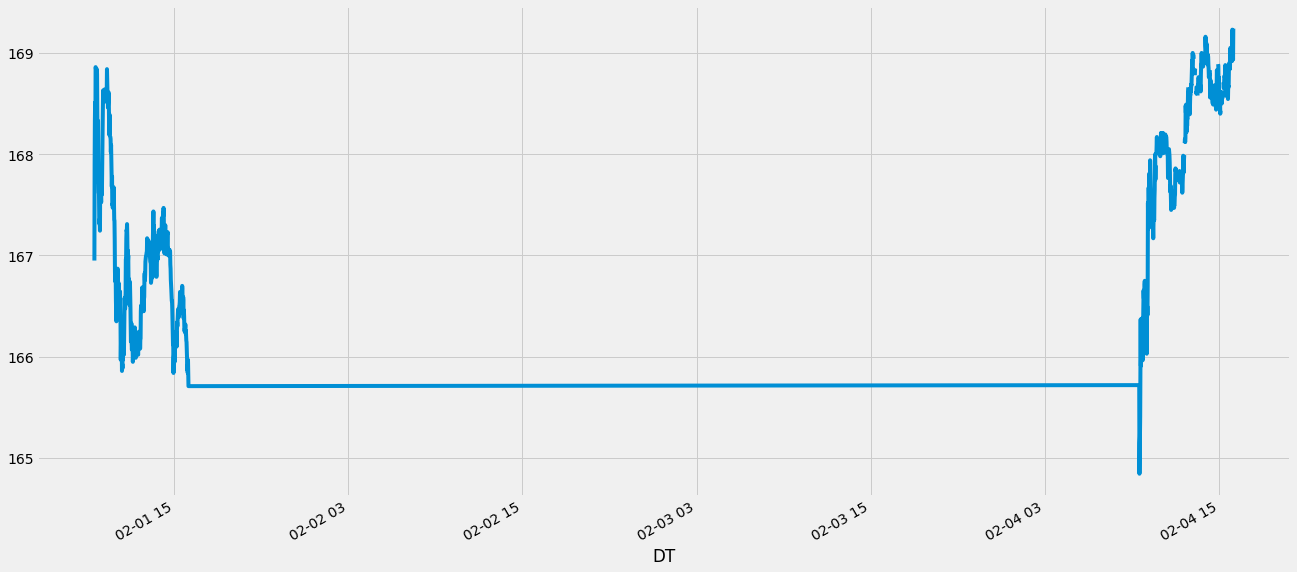

In [112]:
data['close'].plot(figsize=(20,10))

# Market Time and Date Adjust
Let's install some preliminary packages:
* `pandas_market_calendars` [git](https://github.com/rsheftel/pandas_market_calendars) [doc](https://pandas-market-calendars.readthedocs.io/en/latest/usage.html)

In [3]:
from datetime import datetime, time
import pandas_market_calendars as mcal
import pytz

## UTC Time Convert
[Here's](https://www.timeanddate.com/time/aboututc.html) a definition of UTC Time

Function `TimeConvert` inspired by this [stackoverflow post](https://stackoverflow.com/questions/48416511/how-to-convert-utc-to-est-with-python-and-take-care-of-daylight-saving-automatic?noredirect=1&lq=1)

`pytz` documentation is available [here](http://pytz.sourceforge.net/)

In [21]:
def TimeConvert( inDateTime, OutZone):
    from datetime import datetime
    import pytz
    
    #from_zone = pytz.utc
    to_zone = pytz.timezone(OutZone)
    
    return inDateTime.astimezone(to_zone)

let's get a time to test

In [22]:
myStock = Stock(symbol)
book = myStock.get_book()
utc_timestamp = book['quote']['closeTime']
utc_datetime = datetime.fromtimestamp(utc_timestamp / 1e3)

print(f'Our UTC Time is {utc_datetime.strftime("%d %b %y %H:%M %Z")}')
# %Z is silent if object is naive

Our UTC Time is 07 Feb 19 05:00 


In [23]:
est_datetime = TimeConvert(utc_datetime, 'US/Eastern')
print(f'Our EST Time is {est_datetime.strftime("%d %b %y %H:%M %Z")}')

Our EST Time is 06 Feb 19 16:00 EST


## Is Market Open

In [7]:
def IsMarketOpen(DateTimeObj, ExchangeName):
    import pandas_market_calendars as mcal
    from pandas.tseries.offsets import BDay
    
    mkt = mcal.get_calendar(ExchangeName)
    tDate = DateTimeObj.date()
    dateRange = pd.bdate_range( start = tDate - BDay(1), end = tDate + BDay(1))
    mkt_hours = mkt.schedule( start_date = dateRange[0], end_date = dateRange[-1])
    
    return mkt.open_at_time( schedule = mkt_hours, timestamp = DateTimeObj, include_close = True)

In [8]:
IsMarketOpen( datetime(2019, 2, 18, 13,4, tzinfo = pytz.timezone('US/Eastern')), 'NYSE')

False

In [9]:
IsMarketOpen( datetime(2019, 2, 19, 22,34, tzinfo = pytz.timezone(pytz.country_timezones('HK')[0])), 'NYSE')

True

## Market Date Adjust

In [10]:
def MarketDateAdj( DateObj, IntBusinessDays , ExchangeName):
    from datetime import datetime, time, timedelta
    import pandas_market_calendars as mcal
    from pandas.tseries.offsets import BDay
    
    mkt = mcal.get_calendar(ExchangeName)
    holidays = mkt.holidays()
    
    inDay = DateObj.date()
    outDay = inDay + BDay(IntBusinessDays)
    
    while outDay in holidays.holidays:
        outDay += BDay( np.sign(IntBusinessDays) * 1)

    return outDay
    

Time for a test, `Feb 18, 2019` is a market holiday in NYSE

In [11]:
newdate = MarketDateAdj( datetime(2019, 2, 7), IntBusinessDays= 7, ExchangeName='NYSE')
newdate

Timestamp('2019-02-19 00:00:00')

## Market Timer
`days_hours_mins_secs` from this [source](https://stackoverflow.com/questions/2119472/convert-a-timedelta-to-days-hours-and-minutes)

In [175]:
def days_hours_mins_secs( TimeDeltaObj):
    '''
    Note that in Python 3 // is for integer division
    '''
    td = TimeDeltaObj
    hours, remainder = divmod( td.seconds, 3600)
    minutes, seconds = divmod( remainder, 60)

    return td.days, hours, minutes, seconds

def GetTimeToMktOpen( DateTimeObj, ExchangeName, debugmode = False):
    import pandas_market_calendars as mcal
    from datetime import timedelta
    
    # let's standardize time to UTC
    dt_now = TimeConvert(DateTimeObj, 'UTC')
    mkt = mcal.get_calendar(ExchangeName)
    sch = mkt.schedule( start_date = dt_now.date(), 
                           end_date = MarketDateAdj(dt_now, 1, ExchangeName))
    
    close_time = sch['market_close'][0]
    
    # determine today's open or next day's open
    l_which_open = [h > dt_now for h in sch['market_open']]
    if l_which_open[0]:
        open_time = sch['market_open'][0]
    else:
        open_time = sch['market_open'][1]
    
    if IsMarketOpen(DateTimeObj, ExchangeName):
        # Show Time to Market Close
        tdelta = close_time.to_pydatetime() - dt_now
        
        if debugmode :
            print( f'--- Market is Open ---\nClose Time is {close_time}, Time Now is {dt_now}')
        
        return { 'status': 'open', 'd-h-m-s': days_hours_mins_secs(tdelta)}
    else:
        # Show Time to Next Market Open
        tdelta = open_time.to_pydatetime() - dt_now
        if debugmode :
            print( f'--- Market is Closed ---\nNext Open Time is {open_time}, Time Now is {dt_now}')
            print( f'\n--- Market Open Time ---\n{sch["market_open"]}')
            
        return { 'status': 'closed', 'd-h-m-s': days_hours_mins_secs(tdelta)}

### let's test if it works during market hours

In [176]:
# right after Market Open
dt_now = datetime(2019, 2, 7, 9, 35, tzinfo = pytz.timezone('US/Eastern'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Open ---
Close Time is 2019-02-07 21:00:00+00:00, Time Now is 2019-02-07 14:31:00+00:00


{'d-h-m-s': (0, 6, 29, 0), 'status': 'open'}

In [177]:
# right before Market Close
dt_now = datetime(2019, 2, 7, 15, 59, tzinfo = pytz.timezone('US/Eastern'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Open ---
Close Time is 2019-02-07 21:00:00+00:00, Time Now is 2019-02-07 20:55:00+00:00


{'d-h-m-s': (0, 0, 5, 0), 'status': 'open'}

### let's test when market is closed

In [178]:
# just before open
dt_now = datetime(2019, 2, 7, 9, 29, tzinfo = pytz.timezone('US/Eastern'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Closed ---
Next Open Time is 2019-02-07 14:30:00+00:00, Time Now is 2019-02-07 14:25:00+00:00

--- Market Open Time ---
2019-02-07   2019-02-07 14:30:00+00:00
2019-02-08   2019-02-08 14:30:00+00:00
Freq: C, Name: market_open, dtype: datetime64[ns, UTC]


{'d-h-m-s': (0, 0, 5, 0), 'status': 'closed'}

In [179]:
# just after close
dt_now = datetime(2019, 2, 7, 16, 5, tzinfo = pytz.timezone('US/Eastern'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Closed ---
Next Open Time is 2019-02-08 14:30:00+00:00, Time Now is 2019-02-07 21:01:00+00:00

--- Market Open Time ---
2019-02-07   2019-02-07 14:30:00+00:00
2019-02-08   2019-02-08 14:30:00+00:00
Freq: C, Name: market_open, dtype: datetime64[ns, UTC]


{'d-h-m-s': (0, 17, 29, 0), 'status': 'closed'}

how about now

In [180]:
dt_now = datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Closed ---
Next Open Time is 2019-02-08 14:30:00+00:00, Time Now is 2019-02-08 03:06:48.880538+00:00

--- Market Open Time ---
2019-02-08   2019-02-08 14:30:00+00:00
2019-02-11   2019-02-11 14:30:00+00:00
Freq: C, Name: market_open, dtype: datetime64[ns, UTC]


{'d-h-m-s': (0, 11, 23, 11), 'status': 'closed'}

### Market Clock Live Demo

In [189]:
exchange = 'NYSE'
MktTimeDict = GetTimeToMktOpen( datetime.now(pytz.utc), exchange)
d,h,m,s = MktTimeDict['d-h-m-s']

if MktTimeDict['status'] == 'open':
    nextAction = f'until {exchange} close'
else:
    nextAction = f'until {exchange} open'

msg = f'{h}:{m}:{s}'
if d > 0:
    msg = f'{d} days {msg}'
    
print(f'{msg} {nextAction}')

11:12:37 until NYSE open
